Compare linesH points with lineDistH in length of arr. Then test EDA funcitonality
    

In [1]:
import cv2
import numpy as np
import torchvision.transforms as T

from sklearn.neighbors import KernelDensity
from objectDetection import *
from carMasking import *
from imgFeatureUtils import *

%matplotlib inline

forExt = DLForegroundExtractor(512)
videoPath = "/home/hector/speed/speed_DS/v1.mp4"

In [2]:
yolo = objectDetector((512,512),
                       weightPath="yolov3/weights/yolov3.weights",
                       modelDef="yolov3/config/yolov3.cfg")
viz = objectVisualizer(classPath="yolov3/data/coco.names")
tools = objectFocusTools((512,512),yolo)
linesDataset = []
cap = cv2.VideoCapture("/home/hector/speed/speed_DS/v5.avi")
lineSetH = []
lineSetV = []
distSetH = []
distSetV = []
thetaSetH = []
thetaSetV = []
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret == True:
    frame = cv2.resize(frame, (512,512))
    grayFrame = convertImg2Grayscale(frame)

    #generate features from image
    #(-60,-40) vertical, (0,20) horizontal 
    linesV, edgeMap = tools.getObjectLinesAtFrame(frame,grayFrame,(-60,-40))
    linesH, edgeMap = tools.getObjectLinesAtFrame(frame, grayFrame, (0,20))
    lineDistH = getLinesEuclideanDist(linesH)
    lineDistV = getLinesEuclideanDist(linesV)
    thetasH = getLinesThetas(linesH)
    thetasV = getLinesThetas(linesV)

    #append features to containers
    lineSetH.append(linesH)
    lineSetV.append(linesV)
    distSetH.append(lineDistH)
    distSetV.append(lineDistV)
    thetaSetH.append(thetasH)
    thetaSetV.append(thetasV)

    #visualization
    empty = np.zeros((edgeMap.shape[0],edgeMap.shape[1],3))
    empty[:,:,0] = edgeMap
    #frameObjs = viz.drawBoxes(frame,detections)
    linesImg = drawLinesOnImg(empty, linesH)
    cv2.imshow('Frame',linesImg)
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
  else: 
    break

cap.release()
cv2.destroyAllWindows()

#flatten the featureset to get container of features, as the previous features were wrapped inside subarrays
lineSetH = flatten(lineSetH)
lineSetV = flatten(lineSetV)
distSetH = flatten(distSetH)
distSetV = flatten(distSetV)
thetaSetH = flatten(thetaSetH)
thetaSetV = flatten(thetaSetV)



A DISTANCE FILTERING SHOULD BE PERFORMED (HOW???)

In [14]:
#constant real measure
distSetRealH = [1500]*len(distSetH)

normalizedDistSetH = distSetH / max(distSetH)
scaleddistSetRealH = np.multiply(distSetRealH, normalizedDistSetH)
print(scaleddistSetRealH)

[ 650.14449261  545.74020371  545.74020371  708.53589986  946.62467002
  587.07169851  724.86793695  867.02601117  653.13826666  545.74020371
  760.76095157  992.23866698  673.72229747  844.22554037  946.62467002
  992.23866698 1012.3514663   551.66589537  778.50456913  650.14449261
  981.03401861  800.74026444  867.02601117  559.85650515  688.99273048
  735.55452716  653.13826666  946.62467002  992.23866698  650.14449261
  658.09762615  653.13826666  778.50456913  787.63933532  622.55301327
  770.9501682   551.66589537  878.20428977  764.17245277 1015.55816254
  901.58819406  867.02601117  798.30021733  724.86793695  912.34310552
  878.20428977 1106.27479888  901.58819406  981.03401861  857.22026901
 1220.31219354  990.27058835  653.13826666  693.69580713  743.46867099
  639.0473401   901.58819406  857.22026901  578.14233102  901.58819406
  551.66589537  753.02856727  658.09762615  684.25732914  617.30815981
  542.1537013   587.07169851  718.56070013 1174.69710768  587.07169851
  653.

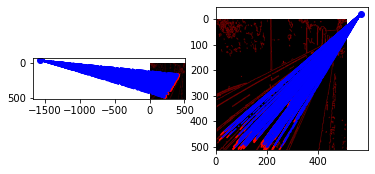

In [3]:
from projectiveGeometry import vis_model, compute2vps
vp1, vp2 = compute2vps(lineSetH, lineSetV)
fig, (ax1, ax2) = plt.subplots(1,2)
vis_model(empty, lineSetH, vp1, ax=ax1, show=False)
vis_model(empty, lineSetV, vp2, ax=ax2, show=False)
plt.show()

## Now to compute camera parameters
Define a configuration object, then a calibration object passing the conf obj. Compute calibration matrix using closed form

In [3]:
from camCal.camCalObjs import CCfg
from camCal.EDAopt import CCamCal

configuration = CCfg(
    Vr=vp2,
    Vl=vp1,
    frameSize=(512,512),
    camHeightMax=5,
    camHeightMin=2,
    linePoints=lineSetH,
    lineDists=lineDistH,
    optimize=False
)

NameError: name 'Object' is not defined